# Isolation Forest

This anomaly detection method involves training a random forest and then identifying data points that are isolated in fewer splits. This method can be applied to high-dimensional data and is relatively insensitive to the distribution of the data. We find that a contamination (proportion of outliers in the sample) of 0.01 works best for this case

In [15]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [16]:
data = pd.read_csv('intc_data.csv')

In [17]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


C:\Users\Tejas Srivatsav\AppData\Local\Temp\ipykernel_30780\3785880456.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [20]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [21]:
# Create an Isolation Forest model
model = IsolationForest(contamination=0.01)

# Fit the model to the data
model.fit(data[indicators])

# Predict anomalies
predictions = model.predict(data[indicators])

# Identify outliers
outliers = data[predictions == -1]

c:\Users\Tejas Srivatsav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


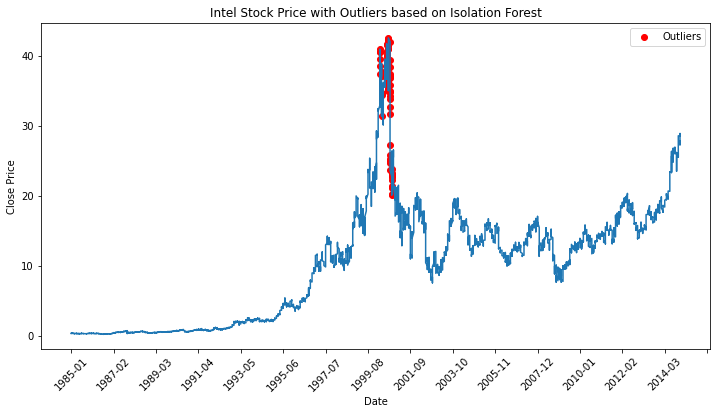

In [22]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on Isolation Forest')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Interestingly, the isolation forest also identifies the Dot-Com Crash. 